다항회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형회귀의 경우 사용
- 기존 피처를 조합해서 항을 늘려주는 작업 진행 => 전처리에서 진행

In [46]:
### 모듈로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [47]:
# 임의의 데이터 생성 => 2D, 사이클론에서 데이터는 2차원만 취급함
X = np.arange(4).reshape(-1,2) # 결과값의 피처가 2개, reshape(-1,2) 열의 수를 2개로 하고 행 값은 니가 알아서 맞추라는 의미
X

array([[0, 1],
       [2, 3]])

In [48]:
# 피처 2개 조합해서 늘리기
poly = PolynomialFeatures(include_bias=False)

poly.fit(X)

poly.transform(X)

array([[0., 1., 0., 0., 1.],
       [2., 3., 4., 6., 9.]])

In [49]:
# 다시 쓸 일이 없을 떄 
# 이렇게 한번에 적어도 됨
X1 = poly.fit_transform(X)
X1.shape   

(2, 5)

In [50]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [51]:
# poly = PolynomialFeatures(include_bias=False, degree=5)

# poly.fit(X)

# print(poly.transform(X))

# X1 = poly.fit_transform(X)
# print(X1.shape)  

# print(poly.get_feature_names_out())

In [52]:
y = np.arange(5)
y.shape

(5,)

모델에 적용

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()
model.fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [2, 5]

In [55]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("poly", poly), ("lrmodel", model)])

pipe.fit(X1, y)

ValueError: Found input variables with inconsistent numbers of samples: [2, 5]

In [ ]:
pipe.named_steps["lrmodel"].coef_ # 기울기나 절편 등 값을 빼오기 위해서 위에서 이름을 지정했음

In [ ]:
pipe.named_steps["poly"].degree

In [56]:
# p333 ~ 334
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
# 임의의 값으로 구성된 x 값에 대해 코사인 변환 값을 반환
def true_fun(X) :
    return np.cos(1.5*np.pi * X)

In [59]:
# X는 0부터 1까지 30개의 임의의 값을 순서대로 셈플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

In [60]:
# y값은 코사인 기반의 true_fun()에서의 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1

In [63]:
plt.figure(figsize = (60, 30))
degrees = [1, 4, 15]

<Figure size 6000x3000 with 0 Axes>


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.

Degree 15 회귀계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


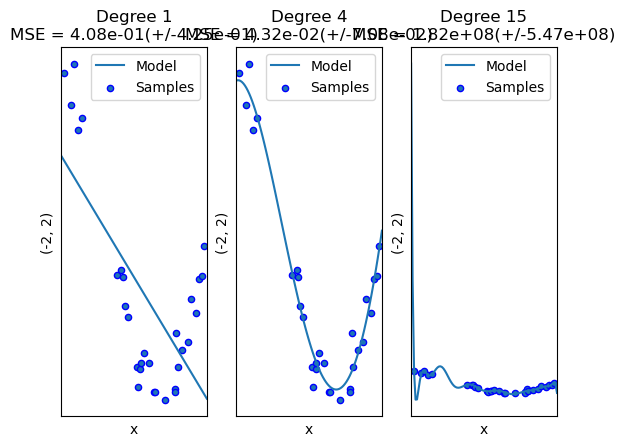

In [64]:
for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv = 10)
    # pipeline을 구성하는 세부 객체를 접그하는 named_step["객체명"]을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나누어서 예측을 수행
    # 테스트 데이터세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label = "Model")
    plt.scatter(X, y, edgecolor = "b", s = 20, label = "Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.ylabel((-2,2))
    plt.legend(loc = "best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.

Degree 15 회귀계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


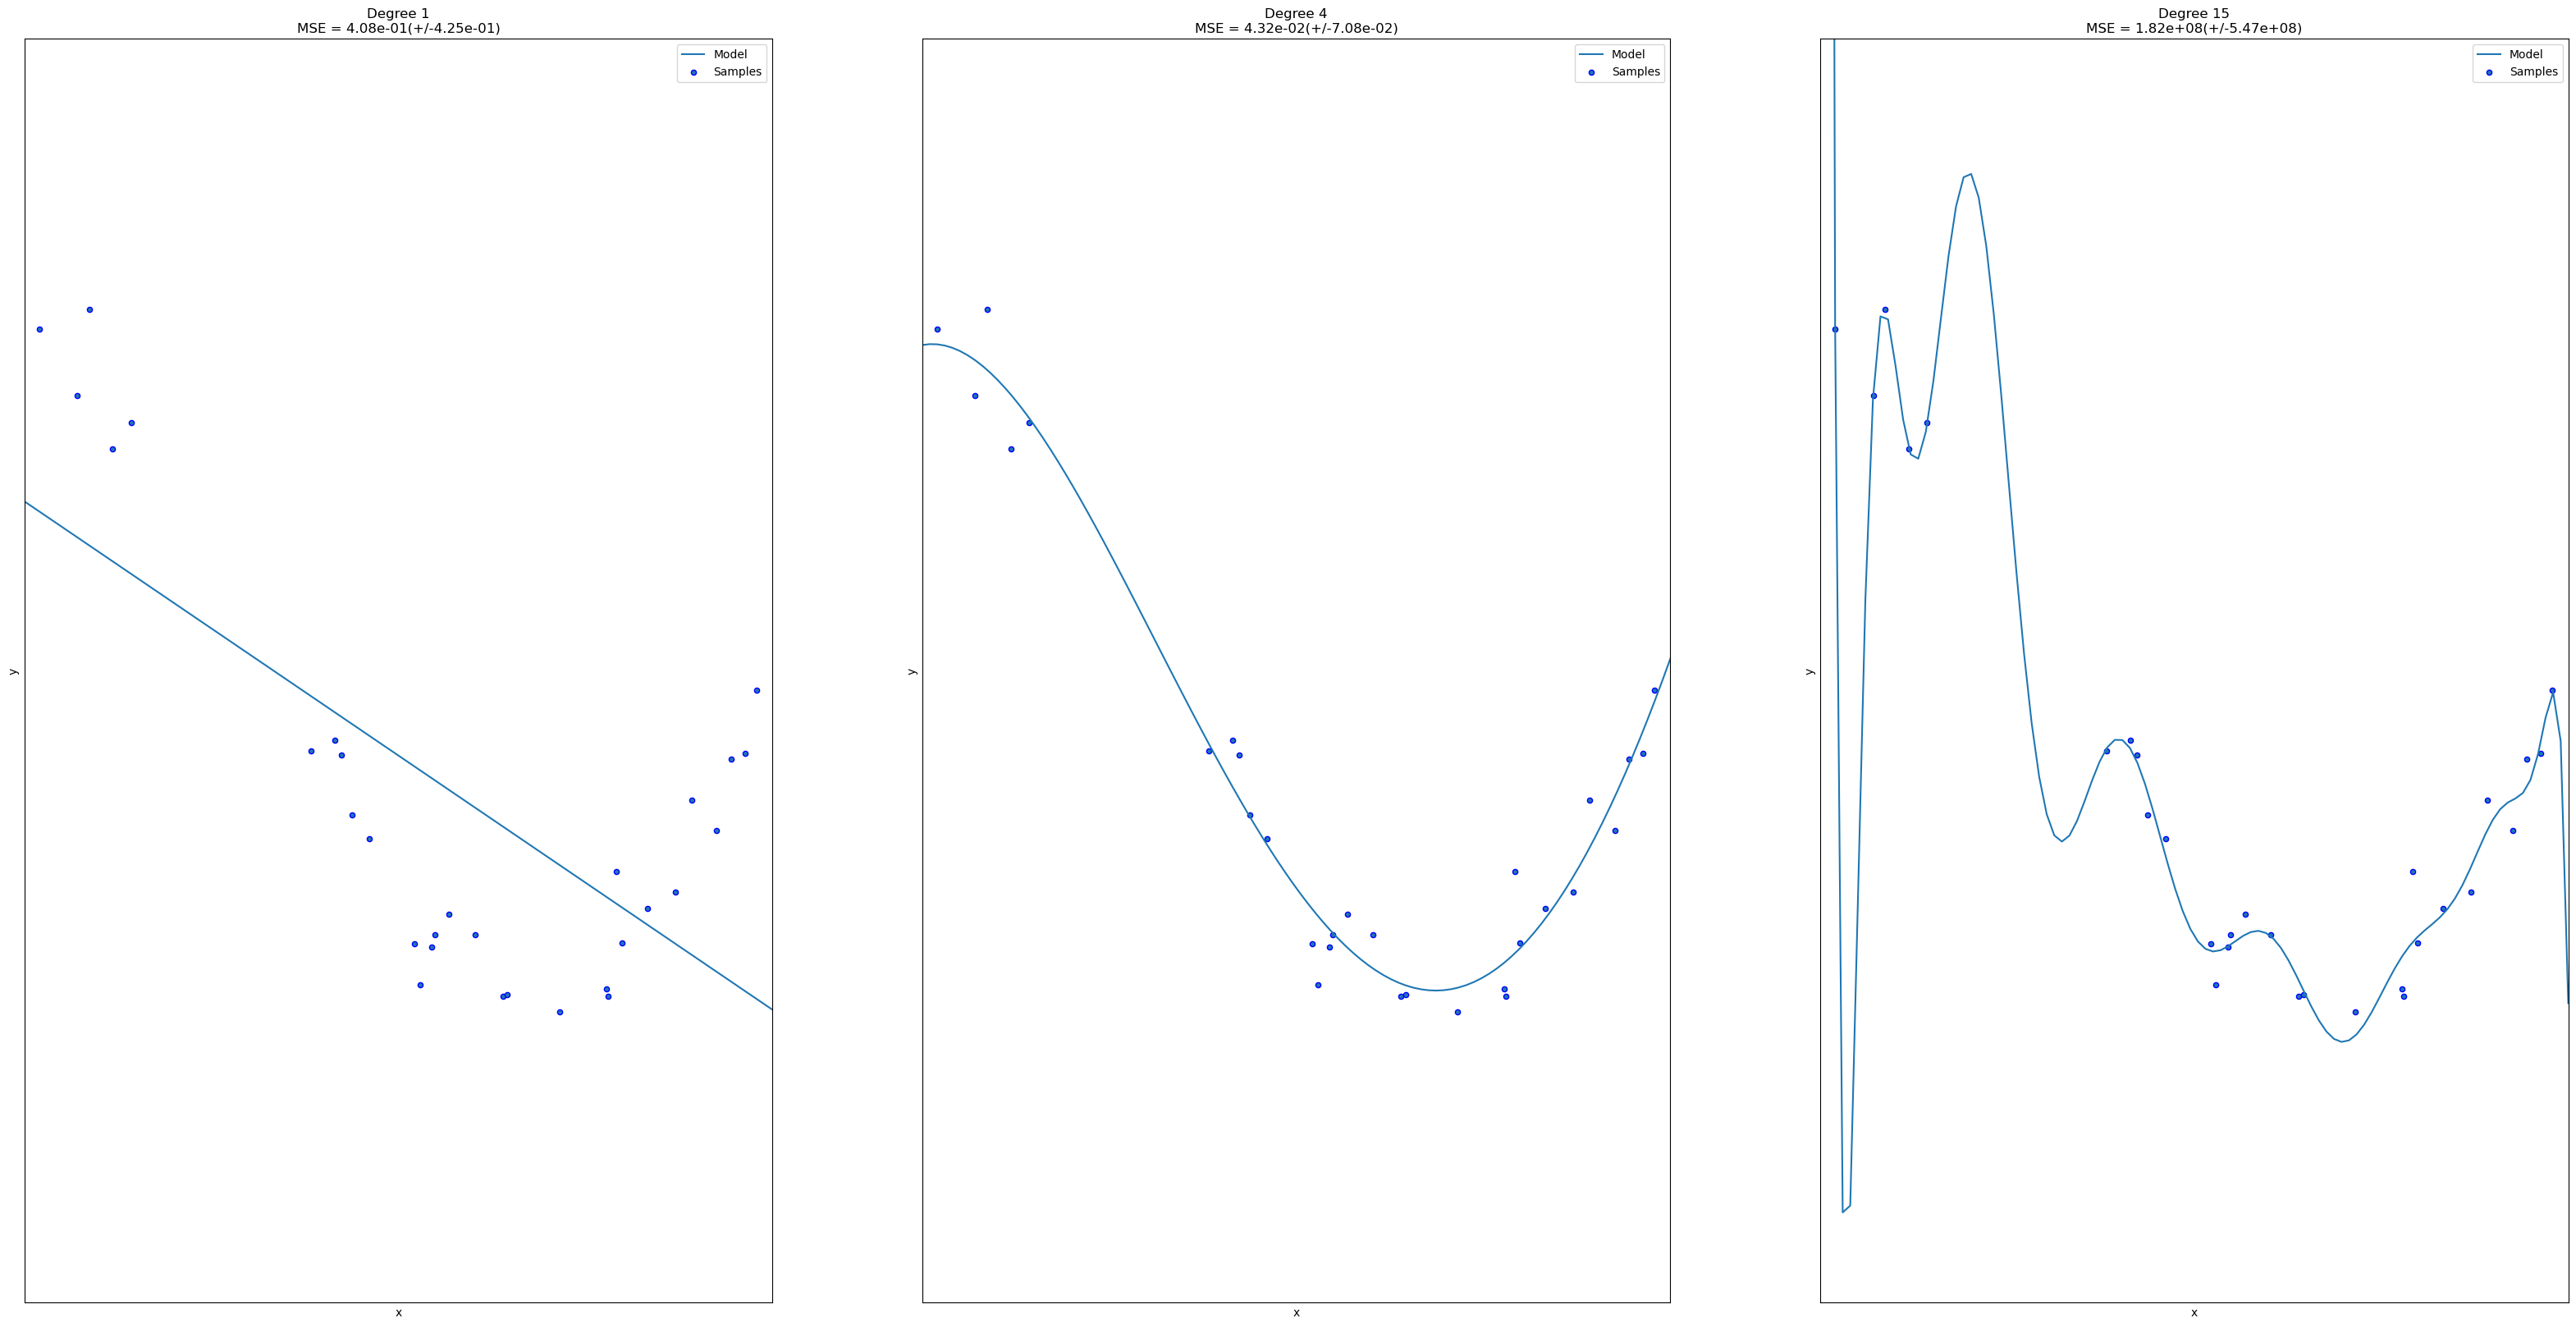

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# 그래프 크기 조정
plt.figure(figsize=(40, 20))

degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1 * np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나누어서 예측을 수행
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()
